<a href="https://colab.research.google.com/github/JMawyin/DCAS/blob/main/DCAS_LL_184_JMawyin_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supporting Analysis for Local Law 184

**By Jose A. Mawyin, PhD**

The following report shows the correlation between traffic volume, number of vehicular crashes and average speed with hour of the day. The data sets in this analysis were sourced from:

* A. Motor Vehicle Crashes: https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD

* B. Traffic Volume Counts: https://data.cityofnewyork.us/api/views/ertz-hr4r/rows.csv?accessType=DOWNLOAD

* C. 2016 NYC Real Time Traffic Speed Data Feed: https://www.kaggle.com/crailtap/nyc-real-time-traffic-speed-data-feed/download


**Section A.** Is a data set on Motor Vehicle Collisions - Crashes. The data set notes indicate that:

"The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage."

*The analysis for Section A. aggregates hourly data by year to create 3 time series showing the percentage of daily crashes per hour of day for the years of 2019, 2017 and 2015.*

**Section B.** Takes data NYC Department of Transportation study on Traffic Volume Counts (2014-2019). The origin of the data is:

"New York City Department of Transportation (NYCDOT) collects traffic volume counts for New York Metropolitan Transportation Council (NYMTC) to validate the New York Best Practice Model (NYBPM)"

*The analysis for Section B. aggregates hourly data by year to create 3 time series showing the total count of detected vehicles per hour of day for the years of 2019, 2017 and 2015.*

**Section C.** The data was sourced from a Kaggle contest and "contains 'real-time' traffic information from locations where NYCDOT picks up sensor feeds within the five boroughs of NYC, mostly on major arterials and highways. NYCDOT uses this information for emergency response and management, see Acknowledgements."

*The analysis for Section C. aggregates hourly data from the year of 2016 showing the average speed of cars per hour of day.*

**Section D.** This section stacks plots from Section A, B and C to show correlations in time of Traffic, Crashes and Average Speed of vehicles.



In [ ]:
from google.colab import drive
drive.mount('/gdrive')
drive.mount('/content/drive')


Mounted at /gdrive
Mounted at /content/drive


In [ ]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

In [ ]:
MVC_Crashes_pth = "/content/drive/MyDrive/Datasets/DCAS/Motor_Vehicle_Collisions_-_Crashes.csv"
MVC_Vehicles_pth = "/content/drive/MyDrive/Datasets/DCAS/Motor_Vehicle_Collisions_-_Vehicles.csv"
TVC_2014_2019_pth = "/content/drive/MyDrive/Datasets/DCAS/Traffic_Volume_Counts__2014-2019_.csv"

## A. Motor Vehicles Collisions - Crashes Overview

### Data Manipulation

In [ ]:
MVC_Crashes = pd.read_csv(MVC_Crashes_pth)

MVC_Crashes.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN


In [ ]:
MVC_Crashes.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           565885
ZIP CODE                          566105
LATITUDE                          216293
LONGITUDE                         216293
LOCATION                          216293
ON STREET NAME                    374225
CROSS STREET NAME                 657718
OFF STREET NAME                  1550898
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5267
CONTRIBUTING FACTOR VEHICLE 2     264823
CONTRIBUTING FACTOR VEHICLE 3    1707436
CONTRIBUTING FACTOR VEHICLE 4    1805387
CONTRIBUTING FACTOR VEHICLE 5    1825507
COLLISION_ID                           0
VEHICLE TYPE COD

In [ ]:
MVC_Crashes_filt = MVC_Crashes.copy()
MVC_Crashes_filt['CRASH_TIME_combined'] = MVC_Crashes_filt["CRASH DATE"] + " " + MVC_Crashes_filt["CRASH TIME"]
MVC_Crashes_filt['dt_CRASH_TIME'] = pd.to_datetime(MVC_Crashes_filt["CRASH_TIME_combined"])

MVC_Crashes_filt.head(2)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH_TIME_combined,dt_CRASH_TIME
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN,04/14/2021 5:32,2021-04-14 05:32:00
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN,04/13/2021 21:35,2021-04-13 21:35:00


In [ ]:
MVC_Crashes_filt['hour_OC'] = MVC_Crashes_filt['dt_CRASH_TIME'].dt.hour
MVC_Crashes_filt['year_OC'] = MVC_Crashes_filt['dt_CRASH_TIME'].dt.year
MVC_Crashes_filt = MVC_Crashes_filt[["CRASH DATE","CRASH TIME","CRASH_TIME_combined","dt_CRASH_TIME","year_OC","hour_OC"]]

MVC_Crashes_filt.head(5)

,CRASH DATE,CRASH TIME,CRASH_TIME_combined,dt_CRASH_TIME,year_OC,hour_OC
0,04/14/2021,5:32,04/14/2021 5:32,2021-04-14 05:32:00,2021,5
1,04/13/2021,21:35,04/13/2021 21:35,2021-04-13 21:35:00,2021,21
2,04/15/2021,16:15,04/15/2021 16:15,2021-04-15 16:15:00,2021,16
3,04/13/2021,16:00,04/13/2021 16:00,2021-04-13 16:00:00,2021,16
4,04/12/2021,8:25,04/12/2021 8:25,2021-04-12 08:25:00,2021,8


In [ ]:
print(MVC_Crashes_filt.year_OC.unique())

[2021 2019 2020 2016 2018 2013 2012 2015 2017 2014]


In [ ]:
MVC_Crashes_plot = MVC_Crashes_filt.copy()
# k = 1000
# MVC_Crashes_plot = MVC_Crashes_plot.sample(n=k)
MVC_Crashes_plot.head(10)

,CRASH DATE,CRASH TIME,CRASH_TIME_combined,dt_CRASH_TIME,year_OC,hour_OC
0,04/14/2021,5:32,04/14/2021 5:32,2021-04-14 05:32:00,2021,5
1,04/13/2021,21:35,04/13/2021 21:35,2021-04-13 21:35:00,2021,21
2,04/15/2021,16:15,04/15/2021 16:15,2021-04-15 16:15:00,2021,16
3,04/13/2021,16:00,04/13/2021 16:00,2021-04-13 16:00:00,2021,16
4,04/12/2021,8:25,04/12/2021 8:25,2021-04-12 08:25:00,2021,8
5,04/13/2021,17:11,04/13/2021 17:11,2021-04-13 17:11:00,2021,17
6,04/13/2021,17:30,04/13/2021 17:30,2021-04-13 17:30:00,2021,17
7,04/16/2021,23:30,04/16/2021 23:30,2021-04-16 23:30:00,2021,23
8,04/11/2021,17:00,04/11/2021 17:00,2021-04-11 17:00:00,2021,17
9,04/16/2021,21:15,04/16/2021 21:15,2021-04-16 21:15:00,2021,21


### Visualizations

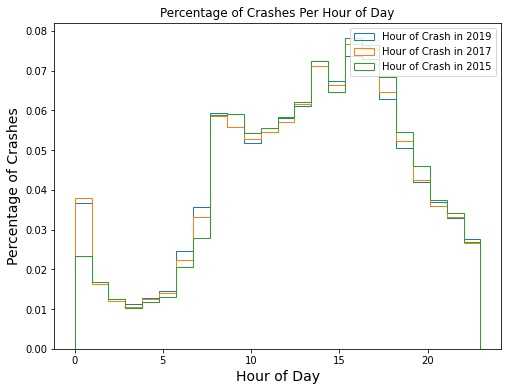

In [ ]:

data_2019_MVC = MVC_Crashes_plot[(MVC_Crashes_plot.year_OC == 2019)].copy()
data_2017_MVC = MVC_Crashes_plot[(MVC_Crashes_plot.year_OC == 2017)].copy()
data_2015_MVC = MVC_Crashes_plot[(MVC_Crashes_plot.year_OC == 2015)].copy()
plt.figure(figsize=(8,6))
plt.hist(data_2019_MVC.hour_OC, bins=24, alpha=1, density=True, histtype = 'step', label="Hour of Crash in 2019")
plt.hist(data_2017_MVC.hour_OC, bins=24, alpha=1, density=True, histtype = 'step', label="Hour of Crash in 2017")
plt.hist(data_2015_MVC.hour_OC, bins=24, alpha=1, density=True, histtype = 'step', label="Hour of Crash in 2015")
plt.xlabel("Hour of Day", size=14)
plt.ylabel("Percentage of Crashes", size=14)
plt.title("Percentage of Crashes Per Hour of Day")
plt.legend(loc='upper right')
plt.show()

## B. Traffic Volume Counts

### Data Manipulation

In [ ]:
MVC_TVC = pd.read_csv(TVC_2014_2019_pth)
MVC_TVC['Date'] = pd.to_datetime(MVC_TVC['Date'])
MVC_TVC['year_OC'] = MVC_TVC['Date'].dt.year
MVC_TVC.head(2)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,year_OC
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,2014-09-13,204.0,177.0,133.0,126.0,141.0,134.0,121.0,180.0,223.0,272.0,386.0,339.0,513,506,520,611,573,546,582,528,432,328,282,240,2014
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,2014-09-13,140.0,51.0,128.0,116.0,144.0,146.0,153.0,219.0,226.0,273.0,317.0,325.0,403,414,379,376,329,362,418,335,282,247,237,191,2014


In [ ]:
MVC_TVC = MVC_TVC.fillna(0)
MVC_TVC.isna().sum()

ID               0
Segment ID       0
Roadway Name     0
From             0
To               0
Direction        0
Date             0
12:00-1:00 AM    0
1:00-2:00AM      0
2:00-3:00AM      0
3:00-4:00AM      0
4:00-5:00AM      0
5:00-6:00AM      0
6:00-7:00AM      0
7:00-8:00AM      0
8:00-9:00AM      0
9:00-10:00AM     0
10:00-11:00AM    0
11:00-12:00PM    0
12:00-1:00PM     0
1:00-2:00PM      0
2:00-3:00PM      0
3:00-4:00PM      0
4:00-5:00PM      0
5:00-6:00PM      0
6:00-7:00PM      0
7:00-8:00PM      0
8:00-9:00PM      0
9:00-10:00PM     0
10:00-11:00PM    0
11:00-12:00AM    0
year_OC          0
dtype: int64

In [ ]:
TVC_columns = list(MVC_TVC.columns.values)
print(TVC_columns)

['ID', 'Segment ID', 'Roadway Name', 'From', 'To', 'Direction', 'Date', '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM', 'year_OC']


In [ ]:
hour_col_lst = ['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM']

In [ ]:
MVC_TVC_agg = MVC_TVC.copy()
MVC_TVC_agg = MVC_TVC_agg.groupby(['year_OC'], as_index=False)[hour_col_lst].apply(lambda x : x.astype(int).sum())
MVC_TVC_agg.head(2)

,year_OC,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2014,1945368,1341495,1008592,889523,1101947,1736593,3040547,4115028,4411203,4261250,4223972,4389952,4576439,4746849,5108765,5372934,5469862,5449032,5207669,4717774,4095823,3512087,3066435,2516810
1,2015,1535613,1063350,776812,662375,771990,1238858,2235987,3104881,3384019,3291849,3344945,3484642,3621337,3759585,4029564,4183920,4207456,4194473,4047761,3679513,3186600,2707045,2337587,1950478


In [ ]:

MVC_TVC_wide = pd.melt(MVC_TVC_agg, id_vars='year_OC', value_vars=['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'])
#MVC_TVC_wide['year_OC'] = MVC_TVC_wide['Date'].dt.year
MVC_TVC_wide.head(10)

,year_OC,variable,value
0,2014,12:00-1:00 AM,1945368
1,2015,12:00-1:00 AM,1535613
2,2016,12:00-1:00 AM,1686103
3,2017,12:00-1:00 AM,1387809
4,2018,12:00-1:00 AM,209582
5,2019,12:00-1:00 AM,1269974
6,2014,1:00-2:00AM,1341495
7,2015,1:00-2:00AM,1063350
8,2016,1:00-2:00AM,1188587
9,2017,1:00-2:00AM,1024182


In [ ]:
MVC_TVC_wide.year_OC.unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

### Visualizations

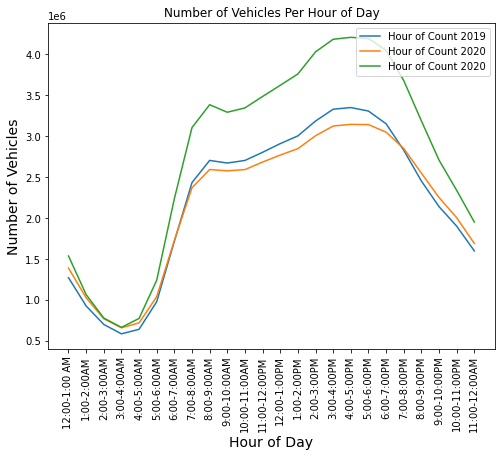

In [ ]:
data_2019_TVC = MVC_TVC_wide[(MVC_TVC_wide.year_OC == 2019)]
data_2017_TVC = MVC_TVC_wide[(MVC_TVC_wide.year_OC == 2017)]
data_2015_TVC = MVC_TVC_wide[(MVC_TVC_wide.year_OC == 2015)]
plt.figure(figsize=(8,6))
plt.plot(data_2019_TVC.variable, data_2019_TVC.value, label="Hour of Count 2019")
plt.plot(data_2017_TVC.variable, data_2017_TVC.value, label="Hour of Count 2020")
plt.plot(data_2015_TVC.variable, data_2015_TVC.value, label="Hour of Count 2020")
plt.xlabel("Hour of Day", size=14)
plt.xticks(rotation = 90)
plt.ylabel("Number of Vehicles", size=14)
plt.title("Number of Vehicles Per Hour of Day")
plt.legend(loc='upper right')
plt.show()

## C. Speed Analysis

### Data Manipulation

Data Sourced From:
https://www.kaggle.com/crailtap/nyc-real-time-traffic-speed-data-feed

In [ ]:
speed_data_pth = "/content/drive/MyDrive/Datasets/DCAS/Kaggle_2016_NYC_RTTSpeed/january2016.csv"

Speed_df = pd.read_csv(speed_data_pth)
Speed_df['DateTime'] = pd.to_datetime(Speed_df['DataAsOf'])
Speed_df['Hour'] = Speed_df['DateTime'].dt.hour
print(len(Speed_df))
Speed_df.head(10)

1202396


,Id,Speed,TravelTime,Status,DataAsOf,linkId,DateTime,Hour
0,1,19.88,260,0,1/1/2016 00:01:01,4616337,2016-01-01 00:01:01,0
1,2,24.23,107,0,1/1/2016 00:01:01,4616325,2016-01-01 00:01:01,0
2,3,19.88,316,0,1/1/2016 00:01:01,4616324,2016-01-01 00:01:01,0
3,4,14.29,234,0,1/1/2016 00:01:01,4616338,2016-01-01 00:01:01,0
4,106,18.02,124,0,1/1/2016 00:01:01,4616323,2016-01-01 00:01:01,0
5,110,55.92,137,0,1/1/2016 00:01:01,4616281,2016-01-01 00:01:01,0
6,119,37.28,175,0,1/1/2016 00:00:37,4456502,2016-01-01 00:00:37,0
7,124,45.98,142,0,1/1/2016 00:00:37,4456501,2016-01-01 00:00:37,0
8,129,60.89,52,0,1/1/2016 00:01:01,4616246,2016-01-01 00:01:01,0
9,137,60.89,70,0,1/1/2016 00:01:01,4616260,2016-01-01 00:01:01,0


In [ ]:
Speed_df.Hour.unique()

array([ 0, 23,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22])

In [ ]:
Ave_hourly_sped_df = Speed_df.groupby('Hour', as_index=False)['Speed'].mean()
Ave_hourly_sped_df.head(2)

,Hour,Speed
0,0,46.370079
1,1,46.843093


### Visualization

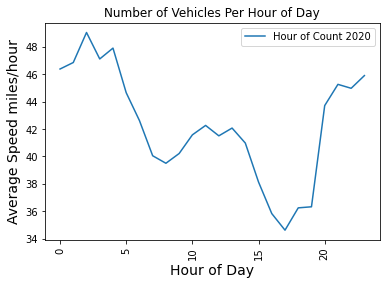

In [ ]:
plt.plot(Ave_hourly_sped_df.Hour, Ave_hourly_sped_df.Speed, label="Hour of Count 2020")
plt.xlabel("Hour of Day", size=14)
plt.xticks(rotation = 90)
plt.ylabel("Average Speed miles/hour", size=14)
plt.title("Number of Vehicles Per Hour of Day")
plt.legend(loc='upper right')
plt.show()

## D. Joint Visualization of Data from Section A, B and C

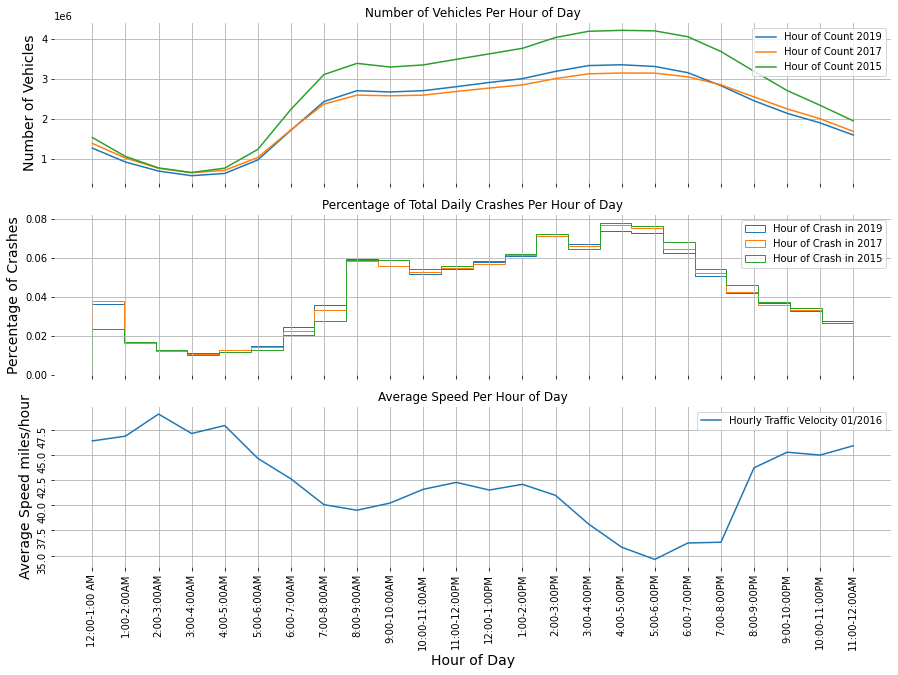

<Figure size 576x432 with 0 Axes>

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, sharex=True, subplot_kw=dict(frameon=False),figsize=(15,10)) # frameon=False removes frames
plt.figure(figsize=(8,6))
ax1.grid()
ax2.grid()
ax3.grid()

ax1.plot(data_2019_TVC.variable, data_2019_TVC.value, label="Hour of Count 2019")
ax1.plot(data_2017_TVC.variable, data_2017_TVC.value, label="Hour of Count 2017")
ax1.plot(data_2015_TVC.variable, data_2015_TVC.value, label="Hour of Count 2015")
ax1.set_ylabel("Number of Vehicles", size=14)
ax1.set_title("Number of Vehicles Per Hour of Day")
ax1.legend(loc='upper right')

ax2.hist(data_2019_MVC.hour_OC, bins=24, alpha=1, density=True, histtype = 'step', label="Hour of Crash in 2019")
ax2.hist(data_2017_MVC.hour_OC, bins=24, alpha=1, density=True, histtype = 'step', label="Hour of Crash in 2017")
ax2.hist(data_2015_MVC.hour_OC, bins=24, alpha=1, density=True, histtype = 'step', label="Hour of Crash in 2015")
ax2.set_ylabel("Percentage of Crashes", size=14)
ax2.set_title("Percentage of Total Daily Crashes Per Hour of Day")
ax2.legend(loc='upper right')

ax3.plot(Ave_hourly_sped_df.Hour, Ave_hourly_sped_df.Speed,label="Hourly Traffic Velocity 01/2016")
ax3.set_xlabel("Hour of Day", size=14)
ax3.set_ylabel("Average Speed miles/hour", size=14)
ax3.set_title("Average Speed Per Hour of Day")
ax3.legend(loc='upper right')
ax3.tick_params(labelrotation=90)
plt.savefig('/content/drive/MyDrive/Datasets/DCAS/DCAS_Traffic_Study.png')
plt.show()